# Explore Bias in the NYC Shooting Incidents Dataset by NYPD

I. Background
---
Since 1994, the New York Police Department (NYPD) maintains and publishes statistical data through CompStat. By providing up-to-date crime-related statistics, the NYPD believes they are objective methods to "reduce crime, improve procedures and training, and provide transparency to the public and government oversight agencies"<sup>[1](https://www1.nyc.gov/site/nypd/stats/crime-statistics/crime-statistics-landing.page)</sup>. Based on the statistics of "seven major crime categories on the citywide, borough, and precinct levels", crime in New York City (NYC) plunges to a level not seen since the 1950s with only 286 killings reported<sup>[2](https://www.nytimes.com/2017/12/27/nyregion/new-york-city-crime-2017.html)</sup>. According to the same NYTimes article, "crime has fallen in New York City in each of the major felony categories including murder and manslaughter, rape, assault, robbery, burglary, grand larceny, and car thefts to a total of 94,806".

However, over the course of its history, NYPD has also been disputed over "the veracity of its tally of shootings and murders"<sup>[3](https://www.nytimes.com/2015/12/30/nyregion/bratton-rebukes-kelly-for-questioning-new-york-crime-data-shame-on-him.html)</sup>. According the same NYTimes article in December 2015, the former NYPD Police Commissioner Raymond W. Kelly accused the NYPD "was manipulating the statistics to make it appear that New York is safer than it actually is" because for example, "people suffering graze wounds, as well as those injured by flying glass caused by gunfire, were not always recorded as shooting victims". Furthermore, NYPD also has a fair share of "12,000 corruption and misconduct cases that have resulted in lawsuit settlements totalling over $400 million"<sup>[4](https://en.wikipedia.org/wiki/New_York_City_Police_Department_corruption_and_misconduct)</sup>. These accusations are troubling signs that data scientists and journalists should be careful when analyzing crime-related statistics published by the NYPD.

Data science techniques are valuable in extracting insights from statistical data. However, if there is one thing I take away from the DT512: Human-Centered Data Science class is that we should be cautious about potential biases in the dataset, whether they are related to its publishing agency, data collection techniques, or filtering protocols. By identifying these biases, a data scientist can avoid analysis pitfalls that confirm harmful social stereotypes or be used by government agencies to justify heavy policing or gentrification policies against perceived dangerous neighborhoods. 

For these motivations, my final project attempts to analyze one of NYPD most popular datasets on NYC Open Data: [the NYC Shooting Incident Dataset](https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8). The goal is to evaluate how such data match NYPD's claim that they "can be used by the public to explore the nature of shooting/criminal activity". I aim to explore the 3 sources of potential biases: statistics, missing data, and geographical distribution, identify analysis pitfalls, and suggest areas where data scientists should cross-check with other data sources.

II. Research Questions
---
Based on the [HCDS Lecture 4](https://wiki.communitydata.cc/upload/7/76/HCDS_2018_week_4_slides.pdf), my analysis structure attempts to explain the data collection and population sampling biases that NYPD might carry, intentionally or unintentionally. As the lecture states, "gathering data, formulating research questions, designing studies, and interpreting results are inherently subjective processes". My hypothesis is that the NYC Shooting Incident dataset might skew toward minorities and low-income neighborhoods by reporting more data points compared to similar statistics of other demographics and neighborhoods. It is also possible that the data reflect the actual shooting incidents distribution that is inherently skewed toward certain categories.

My research structure is as followed:

**a. Bias in Statistics**

I want to explore the distribution of categorical variables including NYC borough classification, location description, and murder flag. Besides the distribution bar plots, I also produce several time plots to explore any significant increase or decrease of demographic indicators (race, age group, sex) that might deviate from common seasonal patterns. 

**b. Bias in Missing Values**

The NYC Shooting Incident dataset carries a few columns with missing values, especially information about the perpetrators. By producing several stacked bar plots, I want to explore which demographics of victims that do not have any information about their perpetrators reported. These can be potential sources of injustices that cases of certain demographics might be more thoroughly investigated by the NYPD than those of other demographics.

**c. Bias in Geographical Distribution**

The NYC Shooting Incident dataset provides longtitude-latitude pinpoint of each shooting incident. Using the open-sourced and free package called Folium, I produce several geographical maps to compare the shooting distribution between 2014 and 2018 data entries. I want to detect any significant shifts in geographical distribution of shoot and provide the basis for other data scientists to map other crime-related statistics.


III. Analysis
---
This analysis is intended to be fully reproducible. Before running the following Notebook cells, please ensure

1. Clone the repository at https://github.com/lmtoan/dt512-final-project.git
2. All the necessary data, already in the `/data` directory, are **extracted on 12/6/2018**. However, to use the most up-to-date data, please clear the folder and download [NYPD Shooting Incident Data *(Historic)*](https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8) and [NYPD Shooting Incident Data *(Year To Date)*](https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Year-To-Date-/5ucz-vwe8). Ensure that they are transferred to `/data` directory and named `NYPD_Shooting_Incident_Data__Historic_.csv` and `NYPD_Shooting_Incident_Data__Year_To_Date_.csv`
3. Ensure that the following software dependencies. Most come with the standard data science package offered by [Anaconda](https://www.anaconda.com/download/#macos):
    - Python 3.6
    - Pandas
    - Numpy
    - Matplotlib
    - Folium (can be installed by `pip install folium`)

Setup
---
- Import the necessary pacakges using `import`
- `from IPython.display import HTML` aids displaying the Folium maps in the notebook
- `%matplotlib inline` aids displaying Matplotlib plots in the notebook

In [1]:
import pandas as pd
import numpy as np
import os, time
import datetime as dt
import folium
from IPython.display import HTML

import matplotlib.pyplot as plt
%matplotlib inline

Data
---
I will be using a combination of historic and year-to-date data that capture every shooting incident occured in New York City from 2013 to 2018. Their links are referenced below:
- [NYPD Shooting Incident Data *(Historic)*](https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8). Created on June 5, 2018. Last updated on November 8, 2018.
- [NYPD Shooting Incident Data *(Year To Date)*](https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Year-To-Date-/5ucz-vwe8). Created on June 5, 2018. Last updated on November 8, 2018.
- These datasets share the same [data footnote](https://data.cityofnewyork.us/api/views/833y-fsy8/files/e4e3d86c-348f-4a16-a17f-19480c089429?download=true&filename=NYPD_Shootings_Incident_Level_Data_Footnotes.pdf) which details variables creation methods, exceptions, filtering guidelines, and addresses any data abnormalies and inconsistencies.

Reviewed by Office of Management Analysis and Planning and provided by New York Police Department, the data provide a comprehensive view about "the shooting event, the location and time of occurrence, and information related to suspect and victim demographics". For the *Historic* dataset, there are 6,407 rows and 18 columns. For the *Year-to-date* dataset, there are 441 rows of similar 18 columns. These datasets are viewed more than 460 times and downloaded 75 times.

**Refer to README.md for full disclaimer of data Terms of Use and Privacy Agreement**

In [2]:
historic_orig = pd.read_csv('data/NYPD_Shooting_Incident_Data__Historic_.csv')
ytd_orig = pd.read_csv('data/NYPD_Shooting_Incident_Data__Year_To_Date_.csv')

In [3]:
historic_orig.columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'PRECINCT',
       'JURISDICTION_CODE', 'LOCATION_DESC', 'STATISTICAL_MURDER_FLAG',
       'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX',
       'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude'],
      dtype='object')

Both `historic_orig` and `ytd_orig` have similar columns. For the following steps:
- I attempt to create a DATESTAMP column that follow Pandas datetime format. This allows me to filter/groupby the dataframe for different time periods
- I also drop columns that are not essential to the analysis
- Because `historic_orig` contains shooting incidents from 2013-2017 and `ytd_orig` contains incidents in 2018, I attempt to concatenate these 2 datasets together to have a full picture from 2013 to 2018. The method used is simply `pd.concat`

In [4]:
def clean(df):
    df['DATESTAMP'] = pd.to_datetime(df.OCCUR_DATE + ' ' + df.OCCUR_TIME, errors='coerce')
    return df.drop(['OCCUR_DATE', 'OCCUR_TIME', 'X_COORD_CD', 'Y_COORD_CD'], axis=1)

historic_clean = clean(historic_orig)
ytd_clean = clean(ytd_orig)

In [5]:
main = pd.concat([historic_clean, ytd_clean])

After concatenated, the `main` dataframe will be the backbone of future analyses and contain the following characteristics
- There are 6,848 non-null rows based on similar unique number of INCIDENT-KEY
- Variable LOCATION-DESC and variables about perpertrators denoted by the prefix PERP have more than half the total rows of missing values. These will be crucial for part b) of the analysis.
- A sample row is displayed below of an incident occured in Manhattan-26 involving a male Black victim between 18-24 past midnight of May 21, 2017. No information about the perpetrator(s) is present and it is not a murder.

In [6]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6848 entries, 0 to 440
Data columns (total 15 columns):
INCIDENT_KEY               6848 non-null int64
BORO                       6848 non-null object
PRECINCT                   6848 non-null int64
JURISDICTION_CODE          6848 non-null int64
LOCATION_DESC              2344 non-null object
STATISTICAL_MURDER_FLAG    6848 non-null bool
PERP_AGE_GROUP             3635 non-null object
PERP_SEX                   3635 non-null object
PERP_RACE                  3635 non-null object
VIC_AGE_GROUP              6848 non-null object
VIC_SEX                    6848 non-null object
VIC_RACE                   6848 non-null object
Latitude                   6848 non-null float64
Longitude                  6848 non-null float64
DATESTAMP                  6848 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 809.2+ KB


In [7]:
main.sample(1)

,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude,DATESTAMP
669,165014945,MANHATTAN,26,0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,40.821271,-73.946081,2017-05-21 00:55:00


a. Potential Bias in Statistics
---

Given a column or a list of columns, the `plot_dist()` function filters null values and produces bar plots based on the variable categories. The arguments are the `main` dataframe, list of columns, filename to store the .png plot, and figure size.

In [20]:
def plot_dist(df, cols, title, fname=str(time.time()), size=(25, 10)):
    def plot(col, ax):
        df.loc[df[col].notnull(), col].value_counts().plot('bar', ax=ax)
        ax.set_title("%s" %col, fontsize=18)
        return ax
    f, ax = plt.subplots(1, len(cols), figsize=size)
    for i in range(len(cols)):
        plot(cols[i], ax[i])
    _ = plt.suptitle(title, fontsize=25)
    os.makedirs('figs', exist_ok=True)
    f.savefig(os.path.join('figs', '%s.png'%fname))

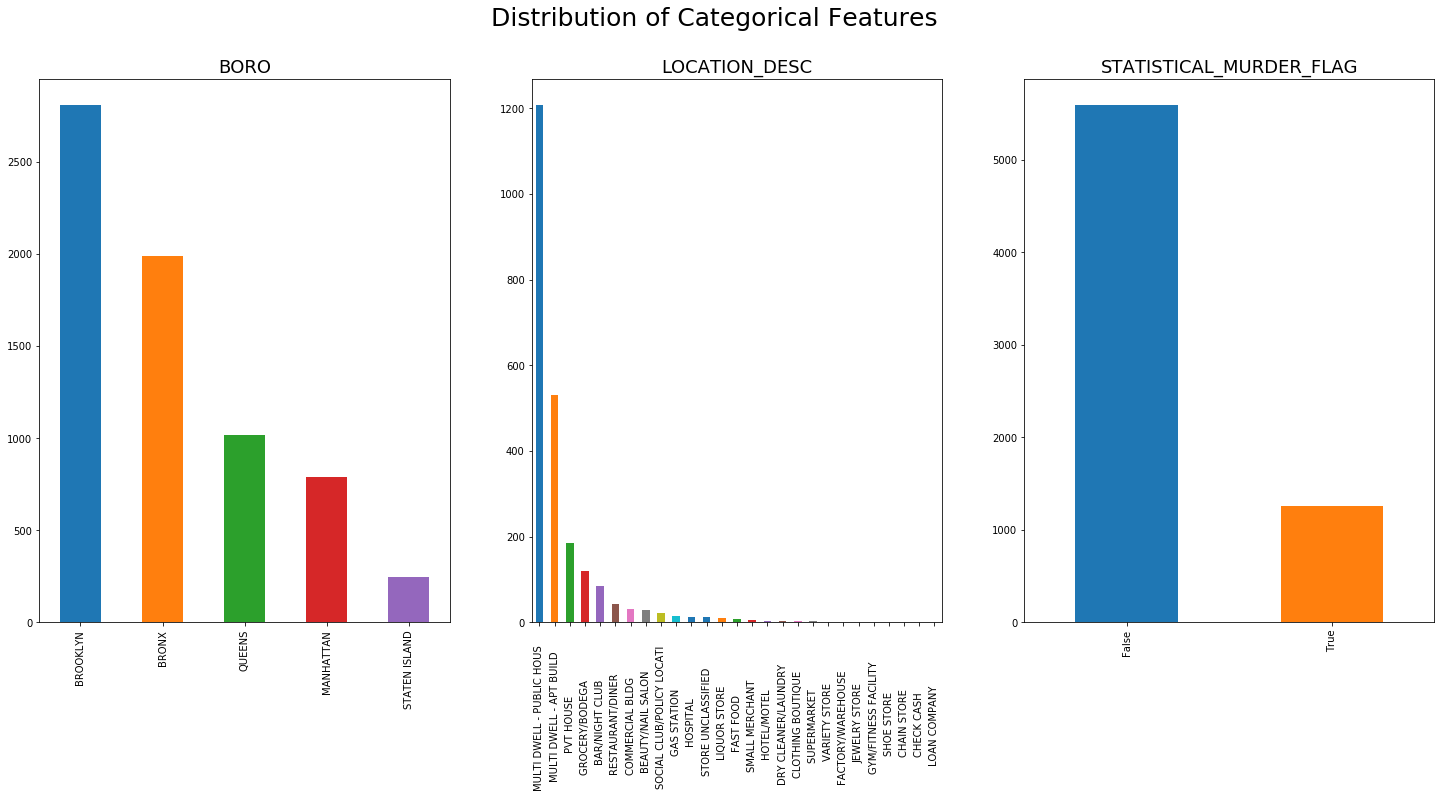

In [23]:
plot_dist(main, ['BORO', 'LOCATION_DESC', 'STATISTICAL_MURDER_FLAG'], 'Distribution of Categorical Features', fname='count_all')

I plot the 3 categorical variables: BORO, LOCATION-DESC, and STATISTICAL-MURDER-FLAG to understand their distributions. A few observations are:
- All 5 NYC boroughs are in the dataset with the most number of incidents reported in Brooklyn, the lowest number of similar statistic in Staten Island.
- There are close to 20 location descriptions where the shooting incidents take place. Close to 1/3 of them take place in Public House and Apartment Buildings.
- More than 1 out of every 6 incidents results in death for the victim.

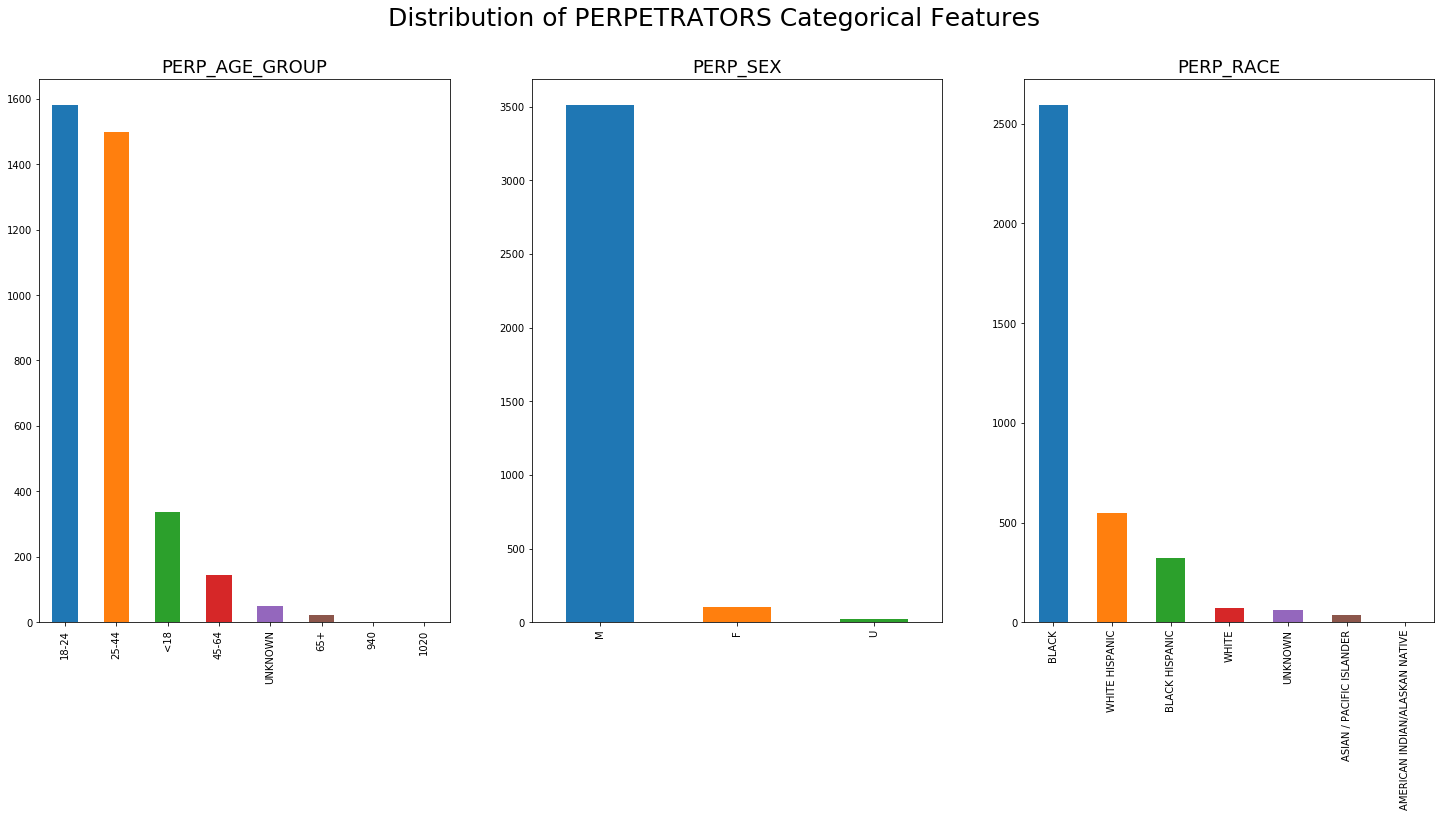

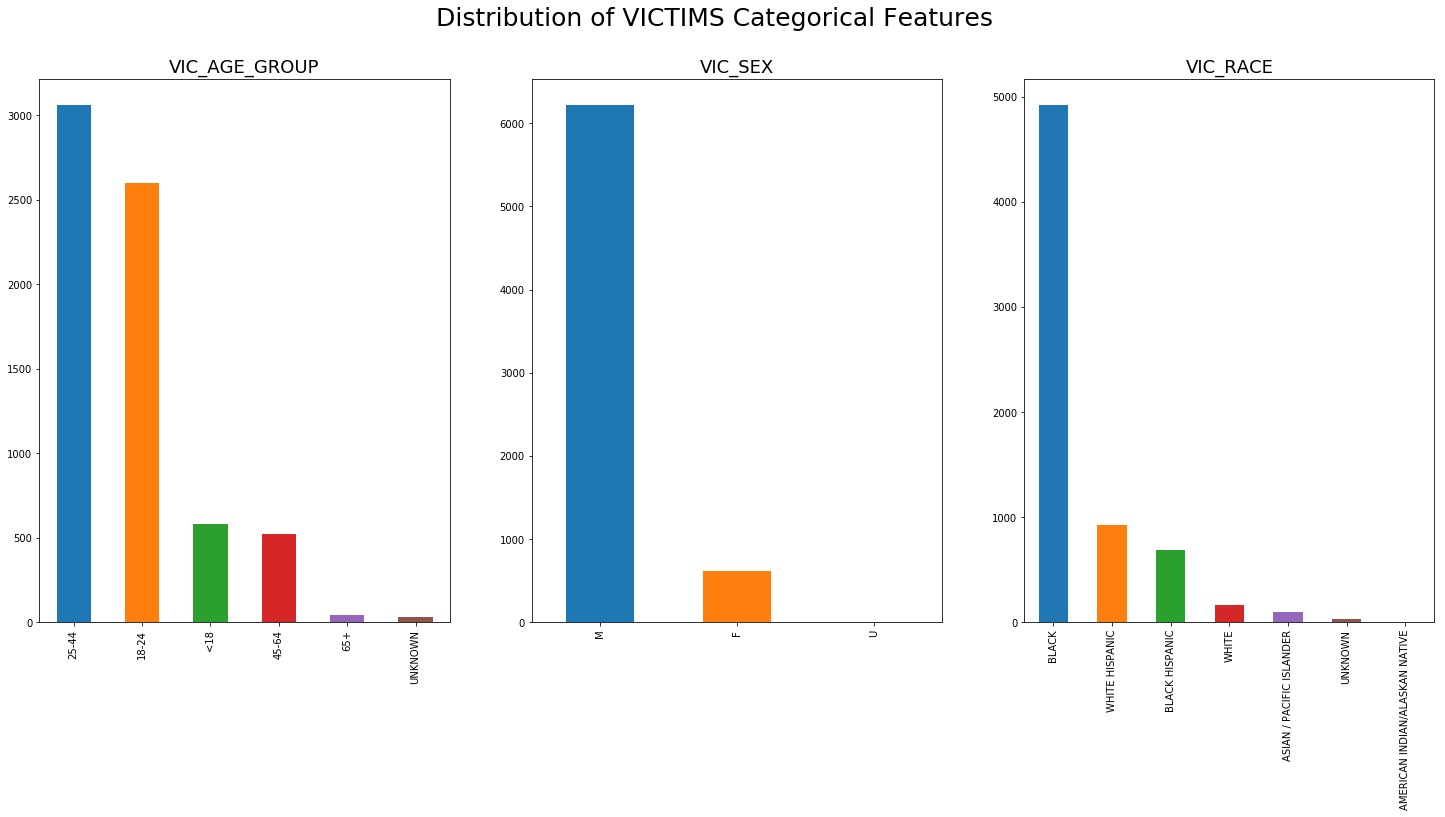

In [29]:
plot_dist(main, ['PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE'], 'Distribution of PERPETRATORS Categorical Features', fname='perp')
plot_dist(main, ['VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE'], 'Distribution of VICTIMS Categorical Features', fname='vic')

For the next two figure, I produce similar bar plots using the function `plot_dist()` for demographic indicators (AGE-GROUP, RACE, SEX) for the perpertrator (-PERP) and victim (-VIC). These figures provide easy-to-understand frequency counts of different demographic categories. A few interesting observations are:
- Out of all non-null perpertrator values (3,635 rows), more than half of perpertrators are in the age-group of 18-24. For obvious reasons, there are rare incidents involving older age groups.
- Almost entire perpertrator set are males.
- And most troubling of all, more than 90% of perpetrators are Black race, followed by White-Hispanic race.

Similar observations can be drawn from the demographic indicators' frequency counts of victims (-VIC). A large majority of victims are of 18-24 age group, males, and Blacks. 

As shown, the data is heavily skewed toward 18-24 age group, male, and Black demographic group. **(...more)**

Now, let's plot such frequency counts over several years of the dataset to see how much of the skewness changes over time.

The following steps are:
- I add a Month-Year column to the dataframe to perform groupby and pivot-table conveniently with Pandas
- For the next 3 figures, I used similar code chunk that
    - Produce a pivot table, based on the month-year as index, BORO as the `columns` argument that provide different categories, and by counting the number of unique INCIDENT-KEYs  
    - Create a plot, add y-axis label as the number of shootings, save the generated figure to `figs/`

In [10]:
main['Month-Year'] = main.DATESTAMP.dt.to_period('M')

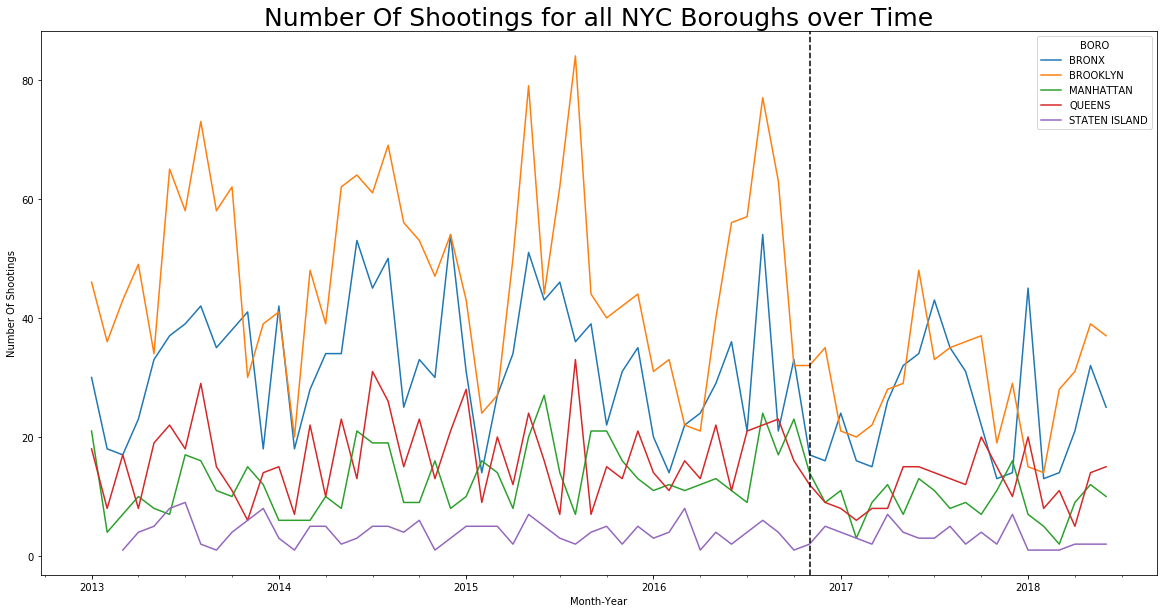

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
main.pivot_table(index='Month-Year', columns='BORO', values='INCIDENT_KEY', aggfunc='count').plot(figsize=(20, 10), ax=ax)
ax.axvline(x='2016-11', color='black', linestyle='--', )
ax.set_ylabel('Number Of Shootings')
ax.set_title('Number Of Shootings for all NYC Boroughs over Time', fontsize=25)
fig.savefig('figs/boro_time.png')

Above is the plot of the number of reported shootings over time with different colored lines as NYC Boroughs. The dash-line marks the November 2016 election when there was a change in administration. Several interesting observations can be drawn:
- Based on the jagged lines order, the ranking of NYC Boroughs having most to fewest number of shooting incidents is Bronx > Brooklyn > Manhattan > Queens > Staten Island. This "conveniently" coincide with their median income ranking from the poorest to the richest<sup>[5](https://en.wikipedia.org/wiki/Demographics_of_New_York_City)</sup>. This confirms my hypothesis that the dataset skews toward reporting more incidents in the lower-income neighborhoods. Such bias can create dangerous steoreotypes toward the neighborhoods with more working-class residents and discourage social policy changes.
- Based on the jagged pattern, there is seasonal pattern in the number of shootings. For all the boroughs, it tends to drop during the winter/spring months and picks up again during the summer/fall months.
- There seems to be a significant drop (more than 50%) in the number of shootings when comparing the number of shootings before and after November 2016 (left and right of the jagged line). The change in administration might have introduced bias in what is considered a "valid" shooting incident as disputed in [[3]](https://www.nytimes.com/2015/12/30/nyregion/bratton-rebukes-kelly-for-questioning-new-york-crime-data-shame-on-him.html). In the [data footnote](https://data.cityofnewyork.us/api/views/833y-fsy8/files/e4e3d86c-348f-4a16-a17f-19480c089429?download=true&filename=NYPD_Shootings_Incident_Level_Data_Footnotes.pdf), an example exclusion is noted as following. 

> Only valid shooting incidents resulting in an injured victim are included in this release. Shooting incidents not resulting in an injured victim are classified according to the appropriate offense according to NYS Penal Law. 

My recommendation is that further research is needed before NYPD, journalists, and government agencies should hastily publish articles like [[2]](https://www.nytimes.com/2017/12/27/nyregion/new-york-city-crime-2017.html) that might misrepresent the city safety.

Next, I produce similar time-trend plots for the demographic indicators (age-group, race, sex) of the perpetrators (-PERP) and victims (-VIC). The code is similar to above, except the `columns` argument is changed to the demographic indicator variables.

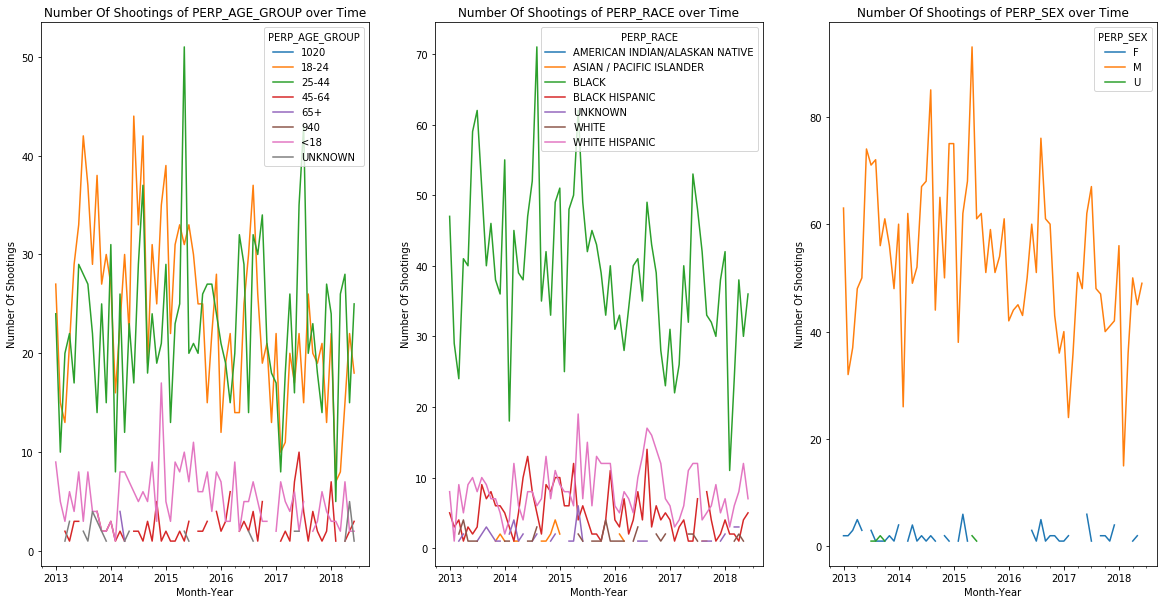

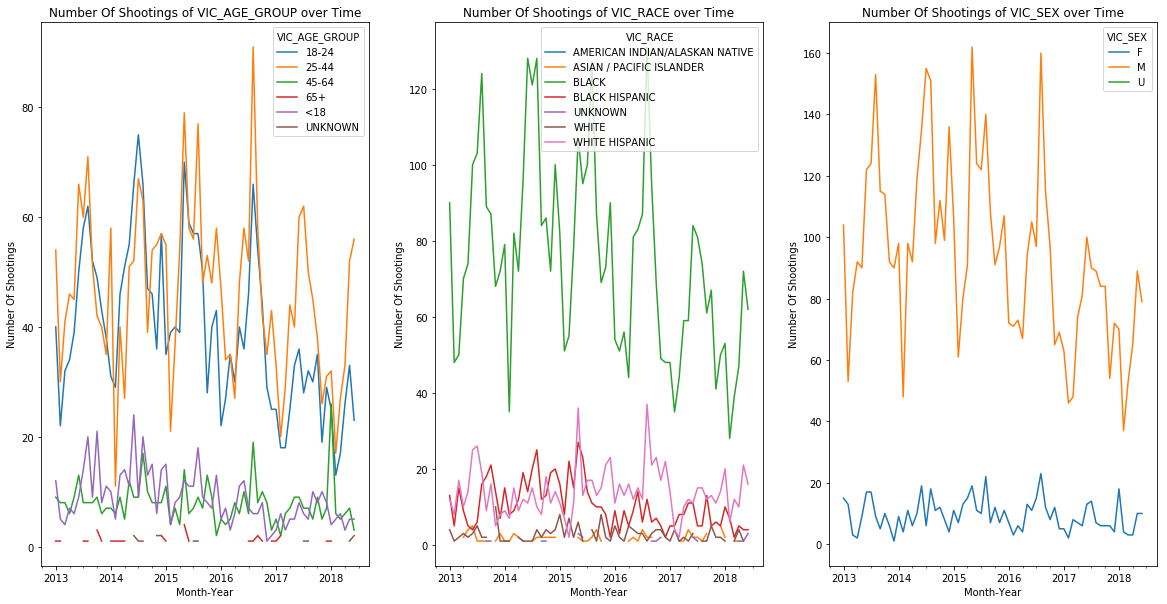

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 10))
main.pivot_table(index='Month-Year', columns='PERP_AGE_GROUP', values='INCIDENT_KEY', aggfunc='count').plot(figsize=(20, 10), ax=ax1)
ax1.set_ylabel('Number Of Shootings')
ax1.set_title('Number Of Shootings of PERP_AGE_GROUP over Time')

main.pivot_table(index='Month-Year', columns='PERP_RACE', values='INCIDENT_KEY', aggfunc='count').plot(figsize=(20, 10), ax=ax2)
ax2.set_ylabel('Number Of Shootings')
ax2.set_title('Number Of Shootings of PERP_RACE over Time')

main.pivot_table(index='Month-Year', columns='PERP_SEX', values='INCIDENT_KEY', aggfunc='count').plot(figsize=(20, 10), ax=ax3)
ax3.set_ylabel('Number Of Shootings')
ax3.set_title('Number Of Shootings of PERP_SEX over Time')

fig.savefig('figs/perp_time.png')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 10))
main.pivot_table(index='Month-Year', columns='VIC_AGE_GROUP', values='INCIDENT_KEY', aggfunc='count').plot(figsize=(20, 10), ax=ax1)
ax1.set_ylabel('Number Of Shootings')
ax1.set_title('Number Of Shootings of VIC_AGE_GROUP over Time')

main.pivot_table(index='Month-Year', columns='VIC_RACE', values='INCIDENT_KEY', aggfunc='count').plot(figsize=(20, 10), ax=ax2)
ax2.set_ylabel('Number Of Shootings')
ax2.set_title('Number Of Shootings of VIC_RACE over Time')

main.pivot_table(index='Month-Year', columns='VIC_SEX', values='INCIDENT_KEY', aggfunc='count').plot(figsize=(20, 10), ax=ax3)
ax3.set_ylabel('Number Of Shootings')
ax3.set_title('Number Of Shootings of VIC_SEX over Time')

fig.savefig('figs/vic_time.png')

The upper row are the frequency-count time trends for perpetrators' demographics, the lower row display those for victims' demographics. As clearly shown, the number of reported shooting incidents, grouped by demographics, carries large biases in population sampling. Across several years, there is a huge positive gap in number of shootings of 18-24, Black, Male demographic compared to other groups, for both perpetrators and victims. There is a similar downward trend toward 2017-18 as noted in other frequency plots.

b. Potential Bias in Missing Data
---
The above section studies the frequency counts and their changes over several years of the NYC Shooting Incident dataset that involve **non-null** values. What about null values, especially those of columns related to perpetrators? The following analysis attempts to understand the frequency of missing values and which demographics they are associated with.

In [12]:
race = main.loc[:, ['PERP_RACE', 'VIC_RACE', 'STATISTICAL_MURDER_FLAG']]

In [13]:
len(race.loc[race['VIC_RACE'].isnull(), 'PERP_RACE'])

0

The above check shows that there is no missing value in the columns related to the victims. This agrees with the data footnote that the dataset contains only shooting incidents that involve injured victim(s).

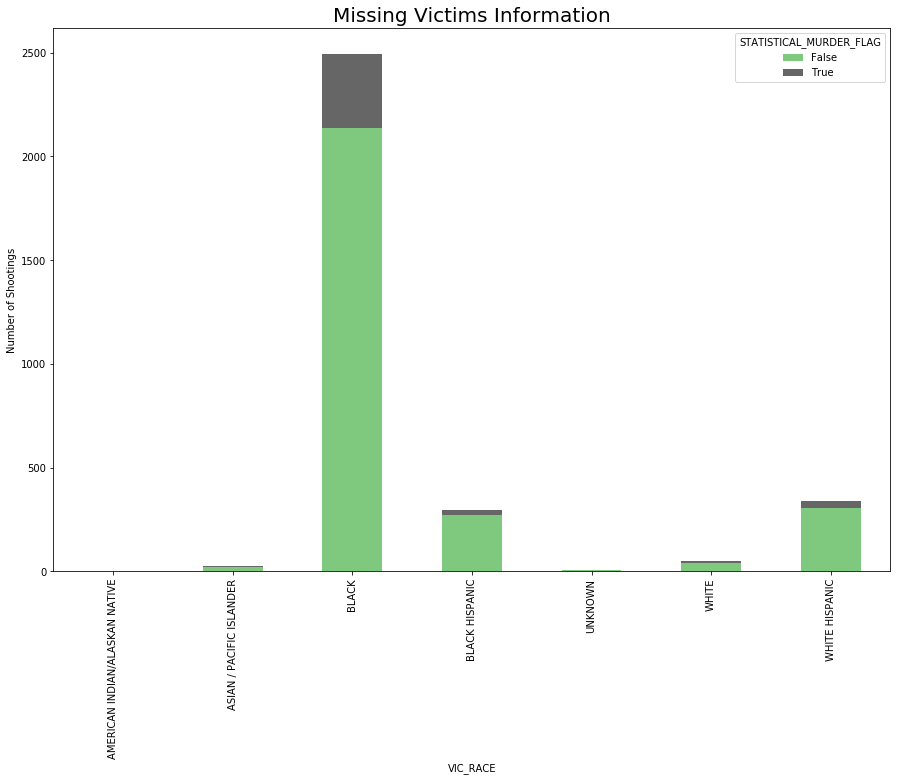

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
race.loc[race['PERP_RACE'].isnull(), :].reset_index(drop=False).pivot_table(index='VIC_RACE', columns='STATISTICAL_MURDER_FLAG', 
                                                                            values='index', aggfunc='count').plot(kind='bar', 
                                                                                                                  stacked=True, cmap='Accent', ax=ax)
ax.set_ylabel('Number of Shootings')
ax.set_title('Missing Victims Information', fontsize= 20)
fig.savefig('figs/%s.png'%'perp_missing')

Similar to the biases identified in part a), there is a disproportionately more Black vitims that do not have their perpetrators' information identified. Out of more than 2,500 missing rows, there are more than 400 dead victims still have their perpetrators unaccounted for. In my opinion, that is quite alarming and raises doubts about NYPD treatments toward cases of minorities' victims.

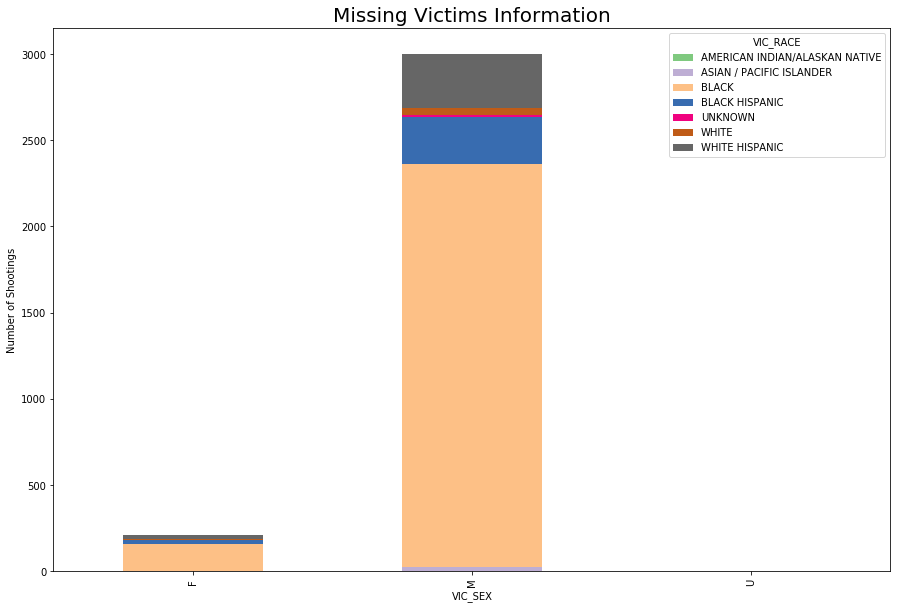

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
main.loc[main['PERP_RACE'].isnull(), :].reset_index(drop=False).pivot_table(index='VIC_SEX', columns='VIC_RACE', 
                                                                            values='index', aggfunc='count').plot(kind='bar', 
                                                                                                                  stacked=True, cmap='Accent', ax=ax)
ax.set_ylabel('Number of Shootings')
ax.set_title('Missing Victims Information', fontsize= 20)
fig.savefig('figs/sex_race_missing.png')

The above stacked bar chart is a breakdown of Male/Female victims of different races still have their perpetrators information unaccounted for. Consistent with previous bias observations, the chart suggests the possibility of mishandling cases of Females and minorities when it comes to investigating shooting perpetrators.

c. Potential Bias in Geographical Distribution
---
The last part of exploring bias in the NYC Shooting Incident dataset involves building an interactive visualization map of all shooting incidents happened every year from 2013 to 2018. Taking advantage of the longitudinal-latitude information, plotting the incident locations on a highly-detailed map of New York City provides a visual understanding of any geographic concentration of shooting incidents and their changes year-by-year. The visualization also encourages other researchers to plot other crime-related statistics of New York City from other sources on the similar map in order to have the full and objective picture of the city safety.

The visualization should **not** be used as factual basis to discriminate certain neighborhoods just because certain locations have a denser concentration of shooting incidents. Heavy policing is rarely the solution is to increase safety of a neighborhood. Instead, lawmakers can use this visualization to understand their reporting biases and double-check other data sources to confirm if a neighborhood is truly at risk.

The method `create_folium_map()` takes in a dataframe and perform the following:
- Set up the coordinate of New York City to have the map zoomed in at level 10 and at the city center upon loading
- Iterate through every row of the dataframe
    - If the incident is a murder (`row.STATISTICAL_MURDER_FLAG == TRUE`), the Marker is in Red. Otherwise, it is in Blue.
    - Using the `popup` argument, each Marker also carries the timestamp (year-month-date-time) and location description where the incident took place if any.
    

In [6]:
def create_folium_map(df):
    NYC_COORDINATES = (40.730610, -73.935242)
    m = folium.Map(location=NYC_COORDINATES, zoom_start=10)
    for i, row in df.iterrows():
        icon_color = 'blue'
        if row.STATISTICAL_MURDER_FLAG: icon_color = 'red'
        folium.Marker(location=[row.Latitude, row.Longitude], 
                      popup='Time: %s. Location: %s' %(str(row.DATESTAMP), row.LOCATION_DESC), 
                      icon=folium.Icon(color=icon_color)).add_to(m)
    return m

In [7]:
viz14 = create_folium_map(main[main.DATESTAMP.dt.year==2014])
viz14.save('viz14.html')

In [28]:
viz18 = create_folium_map(main[main.DATESTAMP.dt.year==2018])
viz18.save('viz18.html')

Due to technical reason, the 2014 visualization map could not be displayed in parallel with that of 2018. Please refer to the [viz14.html](https://github.com/lmtoan/dt512-uw/blob/master/data-512-final-project/viz14.html) file in the outer directory.

It is quite obvious that the concentration of shooting incidents, especially around Manhattan, changes significantly from 2014 to 2018 with the number of reported incidents dropped after 2017. As analyzed above, any interpretation from the visualization is inherently biased and should be cross-check with other data sources. The visualization is provided as the starting point for other researchers to plot other crime-related statistics on the same map.

In [33]:
viz18

Conclusion
---
In this report, I explore the primary sources of data reporting biases with regards to the NYC Shooting Incident dataset. Based on the frequency plots spanning several years, the dataset reports a significantly higher number of shootings for Black, 18-24 years old, Male demographics (both perpetrators and victims), compared to that of other demographic groups. Such trend persists from 2013 to 2018 except a slight dip toward the recent year. With regards to where the shooting incidents took place, there exists a frequency skew toward lower-income boroughs in New York city such as Bronx and Brooklyn. Although difficult to avoid, these biases can be analysis pitfalls that journalists and government agencies might base upon to increase NYPD policing toward certain minorities or introduce discriminative policies toward certain perceived dangerous neighborhoods. When analyzing for missing values, I discover the same trend of a large number of Black and Black Hispanic victims, with more than 400 deaths, still have their perpetrators' information missing until year to date. This can be a warning sign for NYPD to revisit their treatment of assault cases of minorities, not just shooting incidents.

My recommendation is that data scientists should be cautious about performing crime-related analyses solely on NYPD data. By cross-checking with other independent data sources or performing side-by-side comparison with similar statistics from other cities, the analyses can be more reliable and population sampling or data reporting bias from the different police departments can be mitigated. The last part of my analysis offers an interactive visualization map of all the shooting incidents in NYC for that year. Ideally, it can be a starting point for other researchers to include other crime-related statistics on NYC or other regions, so that the public can benefit from a fuller and less subjective evaluation of their neighborhood's safety.

**Human-Center Design Considerations**

I would also like to acknowledge several personal biases that might interfere with the formation of my research questions, treatment of the NYC Shooting Incident dataset, and subsequent data explorations. Given the places that I have resided, I have never encountered any shooting or other life-threatening crimes. Such gives me a limited understanding of the responsibilities, risks, legal considerations, and other factors that determine how NYPD and police departments are supposed to treat shooting incidents. As such, any speculations about NYPD operations or behaviors in this analysis should be treated as factual. Any statistical results from the NYC Open Data datasets are only applied to New York City. Such results are not representative of the United States population and their relationships with law enforcement forces. As an ethical data scientist, I need to warn news outlets and political organizations not to extrapolate these results to their own states and cities.

References
---
Data source: https://opendata.cityofnewyork.us/

Footnotes:
1. https://www1.nyc.gov/site/nypd/stats/crime-statistics/crime-statistics-landing.page
2. https://www.nytimes.com/2017/12/27/nyregion/new-york-city-crime-2017.html
3. https://www.nytimes.com/2015/12/30/nyregion/bratton-rebukes-kelly-for-questioning-new-york-crime-data-shame-on-him.html
4. https://en.wikipedia.org/wiki/New_York_City_Police_Department_corruption_and_misconduct
5. https://en.wikipedia.org/wiki/Demographics_of_New_York_City

The project structure is inspired from the following repositories:
- https://wiki.communitydata.cc/upload/7/76/HCDS_2018_week_4_slides.pdf
- https://github.com/rexthompson/DATA-512-Final-Project
- https://github.com/orbitse/data-512-finalproject